Student Name: Yatin Wason

Student Number: 230135437

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [79]:
import numpy as np

# Load the dataset
# Replace 'your_data.csv' with the actual file name or path
df = pd.read_csv('DIABETES/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [80]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [81]:
print(df.describe())
print(df.info())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

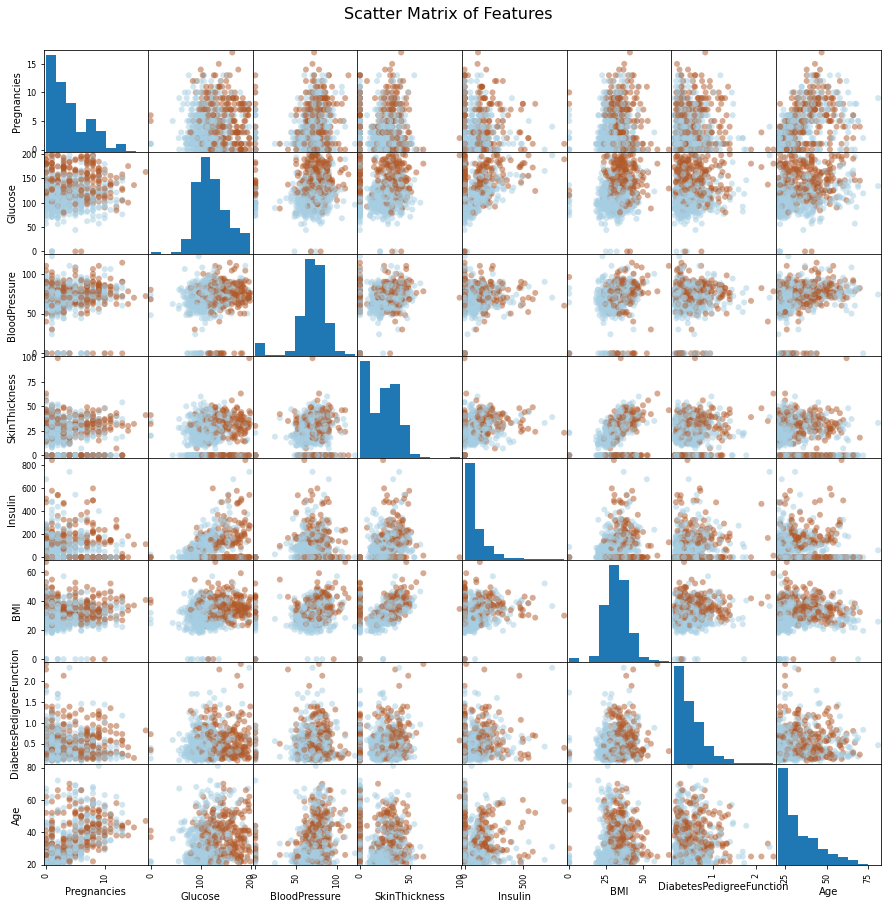

In [82]:
scatter_matrix(df.drop("Outcome", axis=1), c=df["Outcome"], figsize=(15, 15), marker='o', cmap='Paired')

plt.suptitle('Scatter Matrix of Features', y=0.92, fontsize=16)
plt.show()

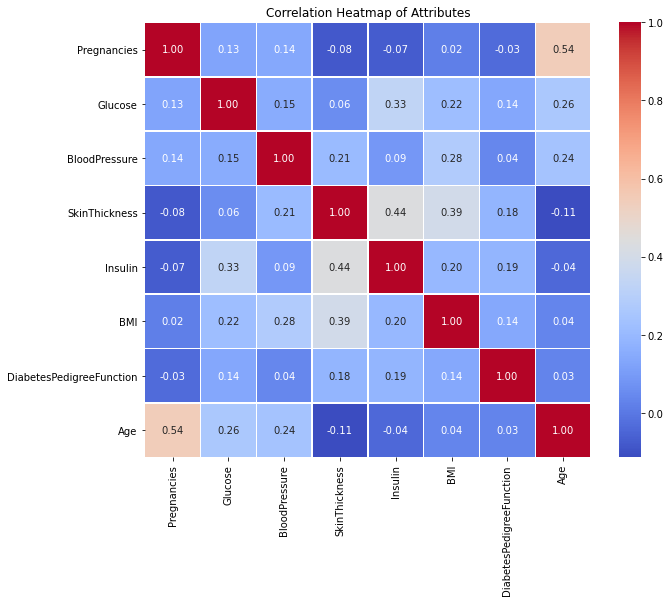

In [83]:
correlation_matrix = df.drop("Outcome", axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Attributes')
plt.show()

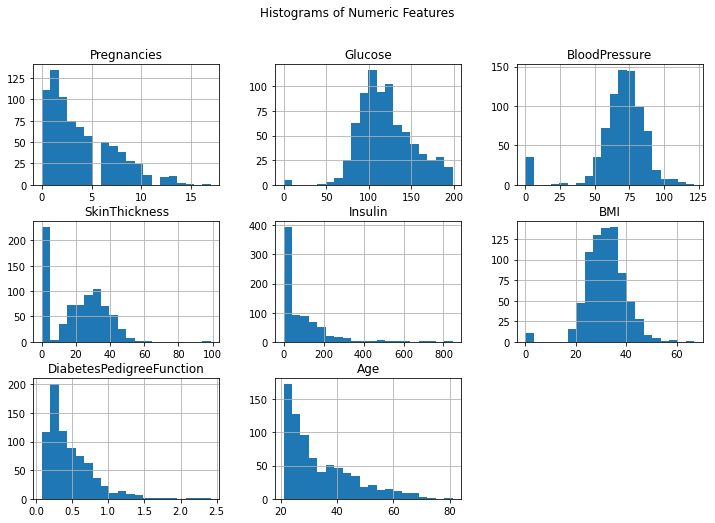

In [84]:
# Visualize the distributions of numeric features
df.drop("Outcome", axis=1).hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [85]:
# Separate features (X) and target variable (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [86]:
# Add a bias term to the features
X = np.column_stack((np.ones(X.shape[0]), X))

# Split the data into training and testing sets
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])

X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

In [87]:
# Standardize the features
mean = np.mean(X_train[:, 1:], axis=0)
std = np.std(X_train[:, 1:], axis=0)

X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [88]:
#Logistic regression using all the variables provided
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])

    for _ in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

    return theta

# Train the logistic regression model using numpy only
learning_rate = 0.01
num_iterations = 1000
theta = logistic_regression(X_train, y_train, learning_rate, num_iterations)

In [89]:
# Predictions on the test set
predictions = sigmoid(np.dot(X_test, theta))
y_pred = np.round(predictions)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.7402597402597403


In [96]:
diabetic_count = np.sum(y_pred == 1)

# Display the count
print("Number of people predicted as diabetic:", diabetic_count)

Number of people predicted as diabetic: 53


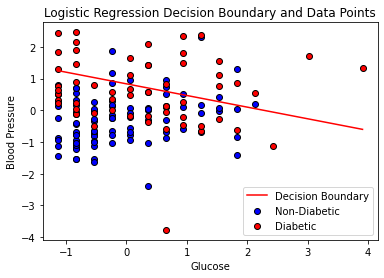

In [90]:
# Create scatter plots for diabetic and non-diabetic cases using Glucose and Blood Pressure as features
plt.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], c='blue', label='Non-Diabetic', edgecolors='k')
plt.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], c='red', label='Diabetic', edgecolors='k')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')

# Plot the decision boundary
x_values = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, 'r-', label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression Decision Boundary and Data Points')
plt.show()

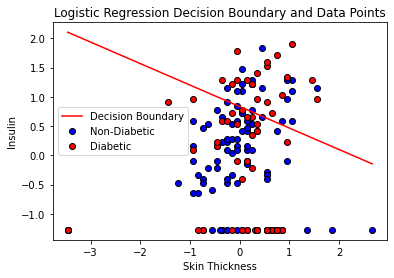

In [91]:
""""Create separate scatter plots for diabetic and non-diabetic cases using Skin Thickness 
and Blood Pressure as features"""
plt.scatter(X_test[y_test == 0, 3], X_test[y_test == 0, 4], c='blue', label='Non-Diabetic', edgecolors='k')
plt.scatter(X_test[y_test == 1, 3], X_test[y_test == 1, 4], c='red', label='Diabetic', edgecolors='k')
plt.xlabel('Skin Thickness')
plt.ylabel('Insulin')

# Plot the decision boundary
x_values = np.linspace(np.min(X_test[:, 3]), np.max(X_test[:, 3]), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, 'r-', label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression Decision Boundary and Data Points')
plt.show()

In [92]:
#Logistic regression using sklearn for verification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)
print("Logistic Regression Classification Report:\n", classification_report_logreg)

Logistic Regression Accuracy: 0.7467532467532467
Logistic Regression Confusion Matrix:
 [[85 11]
 [28 30]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        96
           1       0.73      0.52      0.61        58

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



Accuracy of the model: 0.6363636363636364


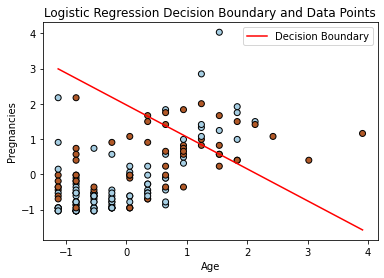

In [93]:
# Selecting 'Age' and 'Pregnancies' as features
X = df.iloc[:, [0, 7]].values

# Adding a bias term to the features
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Selecting 'Outcome' as the target variable
y = df.iloc[:, 8].values

# Splitting the data into training and testing sets
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
split = int(0.8 * X.shape[0])
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# Standardizing the features
mean, std = np.mean(X_train[:, 1:], axis=0), np.std(X_train[:, 1:], axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, num_epochs=1000):
    theta = np.zeros(X.shape[1])

    for epoch in range(num_epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

    return theta

# Training the logistic regression model
theta = logistic_regression(X_train, y_train)

# Making predictions on the test set
z_test = np.dot(X_test, theta)
predictions = sigmoid(z_test)
predictions = (predictions >= 0.5).astype(int)

# Evaluating the model
accuracy = np.mean(predictions == y_test)
print("Accuracy of the model:", accuracy)

# Visualizing the decision boundary (for 2D features)
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Pregnancies')

# Plot the decision boundary
x_values = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, 'r-', label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression Decision Boundary and Data Points')
plt.show()

Accuracy of the model: 0.7207792207792207


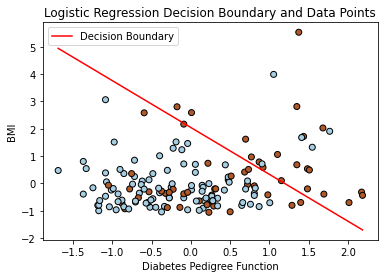

In [94]:
# Selecting 'BMI' and 'DiabetesPedigreeFunction' as features
X = df.iloc[:, [5, 6]].values

# Adding a bias term to the features
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Selecting 'Outcome' as the target variable
y = df.iloc[:, 8].values

# Splitting the data into training and testing sets
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
split = int(0.8 * X.shape[0])
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# Standardizing the features
mean, std = np.mean(X_train[:, 1:], axis=0), np.std(X_train[:, 1:], axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, num_epochs=1000):
    theta = np.zeros(X.shape[1])

    for epoch in range(num_epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

    return theta

# Training the logistic regression model
theta = logistic_regression(X_train, y_train)

# Making predictions on the test set
z_test = np.dot(X_test, theta)
predictions = sigmoid(z_test)
predictions = (predictions >= 0.5).astype(int)

# Evaluating the model
accuracy = np.mean(predictions == y_test)
print("Accuracy of the model:", accuracy)

# Visualizing the decision boundary (for 2D features)
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('BMI')

# Plot the decision boundary
x_values = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, 'r-', label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression Decision Boundary and Data Points')
plt.show()

Accuracy: 0.6038961038961039


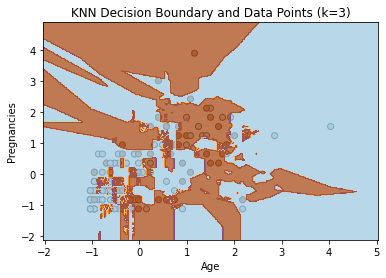

In [95]:
#KNN Implementation for classification
X = df[['Age', 'Pregnancies']].values

# Selecting 'Outcome' as the target variable
y = df['Outcome'].values

# Splitting the data into training and testing sets
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
split = int(0.8 * X.shape[0])
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# Standardizing the features
mean, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to predict the class using KNN
def predict_knn(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

# Function to perform KNN classification on the test set
def knn_predict(X_train, y_train, X_test, k):
    predictions = [predict_knn(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)

# Choosing the value of k (number of neighbors)
k_value = 3

# Making predictions on the test set
y_pred = knn_predict(X_train, y_train, X_test, k_value)

# Evaluating the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Visualizing the decision boundary (for 2D features)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Pregnancies')

# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k_value)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.title(f'KNN Decision Boundary and Data Points (k={k_value})')
plt.show()